## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
plt.rc('font', size=15)

## Importing Input Datasets

In [5]:
data = pd.read_csv(r'C:\Users\hoc\Desktop\Study\Analytixlabs\Case Studies\ML with Python\4. Segmentation of Credit Card Customers\CC_GENERAL.csv')

## Data Inspection

In [17]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Profile Report using Pandas Profiling

#### A customized config file have been used here to minimize the output HTML file.

In [6]:
CC_ProfileReport = pandas_profiling.ProfileReport(data, r'C:\Users\hoc\Jupyter Files\config_medium.yaml')

In [7]:
#CC_ProfileReport.to_file(output_file='CC_ProfileReport.html')

In [8]:
CC_ProfileReport

#### Separating Categorical and Numerical Variables

In [9]:
num_cols = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_cols = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print('Numerical Variables :', num_cols)
print('Categorical Variables :', cat_cols)

Numerical Variables : ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical Variables : ['CUST_ID']


In [34]:
data[num_cols].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
data[cat_cols].head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [122]:
data.CUST_ID.nunique()

8950

#### 'CUST_ID' has high cardinality and that's why it will be dropped due to it's insignificancy, that leaves us with Numerical Variables only.

#### Creating a copy of data before moving to Data Pre-Processing Steps.

In [10]:
CCData = data.copy()

In [11]:
CCData.drop(columns=['CUST_ID'], inplace=True)

#### UDF to get Data audit Report for Continous Variables

In [124]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [125]:
CCData[num_cols].apply(var_summary)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
N,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.949000e+03,8.950000e+03,8.637000e+03,8950.000000,8950.000000
NMISS,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,3.130000e+02,0.000000,0.000000
SUM,1.400205e+07,7851.572994,8.978683e+06,5.302314e+06,3.679055e+06,8.760896e+06,4388.637408,1811.996268,3261.714207,1209.540593,29077.000000,131653.000000,4.022083e+07,1.551164e+07,7.464152e+06,1375.746104,103080.000000
MEAN,1.564475e+03,0.877271,1.003205e+03,5.924374e+02,4.110676e+02,9.788711e+02,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4.494449e+03,1.733144e+03,8.642065e+02,0.153715,11.517318
MEDIAN,8.733852e+02,1.000000,3.612800e+02,3.800000e+01,8.900000e+01,0.000000e+00,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3.000000e+03,8.569015e+02,3.123439e+02,0.000000,12.000000
STD,2.081532e+03,0.236904,2.136635e+03,1.659888e+03,9.043381e+02,2.097164e+03,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3.638816e+03,2.895064e+03,2.372447e+03,0.292499,1.338331
VAR,4.332775e+06,0.056124,4.565208e+06,2.755228e+06,8.178274e+05,4.398096e+06,0.161098,0.089004,0.157965,0.040049,46.575803,617.902719,1.324098e+07,8.381394e+06,5.628503e+06,0.085556,1.791129
MIN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+01,0.000000e+00,1.916300e-02,0.000000,6.000000
P1,6.510059e-02,0.090909,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000e+00,1.952448e+01,0.000000,6.000000
P5,8.814518e+00,0.272727,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,8.998892e+01,7.328201e+01,0.000000,8.000000


In [126]:
len(num_cols)

17

In [9]:
print('There are %d Numerical Variables in the Data.'%len(num_cols))

There are 17 Numerical Variables in the Data.


### Outliers Inspection using Boxplots

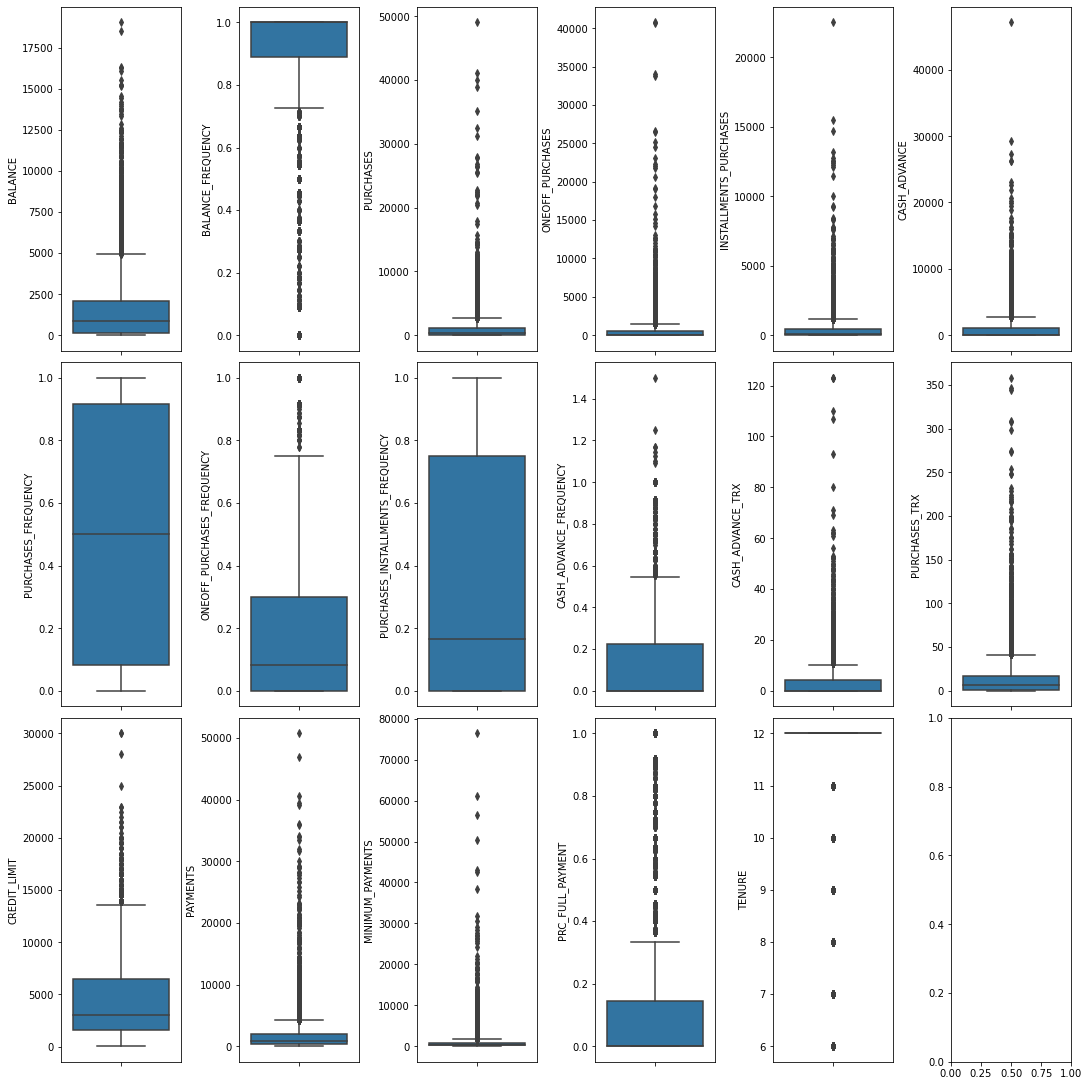

In [39]:
fig, ax = plt.subplots(nrows=3,ncols=6,figsize=(15,15))
ax = ax.flatten()

for i,j in enumerate(CCData[num_cols].columns):
    ax[i]=sns.boxplot(data=CCData[num_cols],y=j,ax=ax[i])
plt.tight_layout(pad=0.4)
plt.show()

### Duplicate Value Inspection

In [127]:
CCData.duplicated().sum()

0

## Data Manipulation

### Outliers Treatment

Capping the Variables at 1st and 99th Percentiles.

In [12]:
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99), lower = x.quantile(0.01))
    return x

In [13]:
CCData[num_cols] = CCData[num_cols].apply(lambda x: outlier_capping(x))

### Missing Values Treatment

In [130]:
CCData[num_cols].isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
print('% of Missing Values in MINIMUM_PAYMENTS :', round(CCData[num_cols].MINIMUM_PAYMENTS.isna().sum()/len(CCData[num_cols]),3), '%')

% of Missing Values in MINIMUM_PAYMENTS : 0.035 %


#### CREDIT_LIMIT has only 1 missing variable which can just be imputed by mean. But MINIMUM_PAYMENTS has 313 which is ~ 0.035% of the whole variable.

In [14]:
CCData.CREDIT_LIMIT.fillna(CCData.CREDIT_LIMIT.mean(), inplace=True)

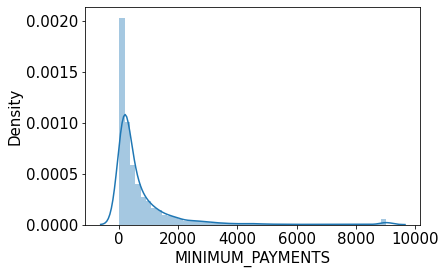

In [18]:
sns.distplot(CCData.MINIMUM_PAYMENTS)
plt.show()

In [19]:
CCData.MINIMUM_PAYMENTS.skew()

4.178516859042737

#### As we can see the data is skewed to the right, so we will go for Median Value Imputation

In [15]:
CCData.MINIMUM_PAYMENTS.fillna(CCData.MINIMUM_PAYMENTS.median(), inplace=True)

In [21]:
CCData.MINIMUM_PAYMENTS.isna().sum().sum()

0

### Deriving Key Performance Indicators (KPIs)

#### 1. Monthly average purchase and cash advance amount.

In [16]:
CCData['MON_AVG_PURCHASE'] = CCData.PURCHASES/CCData.TENURE

In [17]:
CCData['MON_AVG_CA_AMT'] = CCData.CASH_ADVANCE/CCData.TENURE

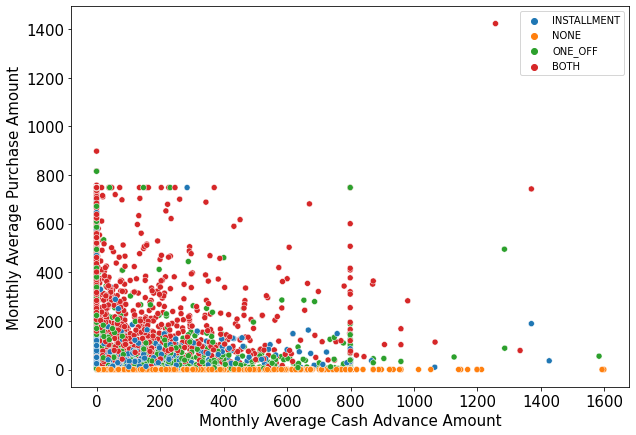

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(CCData.MON_AVG_CA_AMT, CCData.MON_AVG_PURCHASE, hue=CCData.PURCHASE_TYPE)
plt.xlabel('Monthly Average Cash Advance Amount')
plt.ylabel('Monthly Average Purchase Amount')
plt.legend(loc='upper right', fontsize=10)
plt.show()

#### 2. Purchases by type (one-off, installments).

In [18]:
CCData['PURCHASE_TYPE'] = np.where((CCData.ONEOFF_PURCHASES > 0) & (CCData.INSTALLMENTS_PURCHASES > 0) , 'BOTH', 
                             np.where((CCData.ONEOFF_PURCHASES > 0) & (CCData.INSTALLMENTS_PURCHASES == 0) , 'ONE_OFF', 
                                np.where((CCData.ONEOFF_PURCHASES == 0) & (CCData.INSTALLMENTS_PURCHASES > 0) , 'INSTALLMENT', 'NONE')))

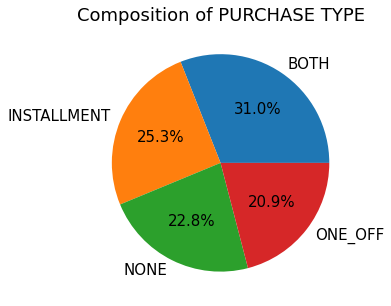

In [41]:
plt.figure(figsize=(5,5))
plt.pie(CCData.PURCHASE_TYPE.value_counts(), autopct='%.1f%%', labels=CCData.PURCHASE_TYPE.value_counts().index)
plt.title('Composition of PURCHASE TYPE')
plt.show()

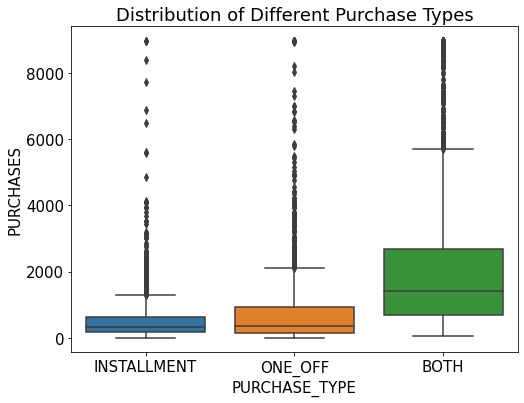

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(data=CCData[CCData.PURCHASE_TYPE!='NONE'], x='PURCHASE_TYPE', y='PURCHASES')
plt.title('Distribution of Different Purchase Types')
plt.show()

#### 3. Limit usage (balance to credit limit ratio).

In [19]:
CCData['LIMIT_USAGE'] = CCData.BALANCE/CCData.CREDIT_LIMIT

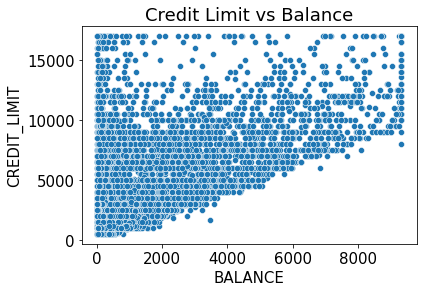

In [63]:
sns.scatterplot(CCData.BALANCE, CCData.CREDIT_LIMIT)
plt.title('Credit Limit vs Balance')
plt.show()

#### 4. Payments to minimum payments ratio etc.

In [20]:
CCData['PAYMENT_RATIO'] = CCData.PAYMENTS/CCData.MINIMUM_PAYMENTS

In [21]:
CCData[['MON_AVG_PURCHASE', 'MON_AVG_CA_AMT', 'PURCHASE_TYPE', 'LIMIT_USAGE', 'PAYMENT_RATIO']].round(2).head()

,MON_AVG_PURCHASE,MON_AVG_CA_AMT,PURCHASE_TYPE,LIMIT_USAGE,PAYMENT_RATIO
0,7.95,0.00,INSTALLMENT,0.04,1.45
1,0.00,536.91,NONE,0.46,3.83
2,64.43,0.00,ONE_OFF,0.33,0.99
3,124.92,17.15,ONE_OFF,0.22,0.00
4,1.33,0.00,ONE_OFF,0.68,2.77


In [22]:
for x in ['MON_AVG_PURCHASE', 'MON_AVG_CA_AMT', 'LIMIT_USAGE', 'PAYMENT_RATIO']:
    num_cols.append(x)

In [23]:
cat_cols = ['PURCHASE_TYPE']

### Correlation Matrix

In [62]:
Corr_Matrix = CCData[num_cols].corr()
Corr_Matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CA_AMT,LIMIT_USAGE,PAYMENT_RATIO
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,...,0.133319,0.528941,0.344744,0.587668,-0.331618,0.074122,0.163451,0.509462,0.564166,-0.144659
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,...,0.212610,0.098321,0.092491,0.208279,-0.098040,0.121525,0.166118,0.090456,0.447095,-0.165684
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,...,0.780817,0.367452,0.536270,0.131455,0.202887,0.107263,0.992542,-0.094178,-0.088140,0.175749
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,...,0.630735,0.342648,0.482418,0.064248,0.145981,0.080378,0.881978,-0.066403,-0.069823,0.164373
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,...,0.687538,0.239949,0.369886,0.148561,0.215048,0.103310,0.700598,-0.104580,-0.089254,0.119730
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,...,-0.112613,0.314381,0.425517,0.257143,-0.179068,-0.083485,-0.084927,0.972029,0.254374,0.031785
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,...,0.642234,0.119603,0.120897,0.001043,0.305802,0.061506,0.504246,-0.245552,-0.217578,0.044903
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,...,0.601289,0.296099,0.278313,-0.016426,0.157531,0.082466,0.606508,-0.105320,-0.099701,0.106494
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,...,0.593674,0.060237,0.097830,0.032330,0.250087,0.073275,0.396285,-0.206060,-0.174508,0.028673
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,...,-0.151307,0.134741,0.215544,0.203585,-0.253292,-0.129136,-0.143088,0.670232,0.391003,-0.054787


In [63]:
#Corr_Matrix.to_csv('CCData_Corr.csv')

#### Heat Map of Correlation Matrix

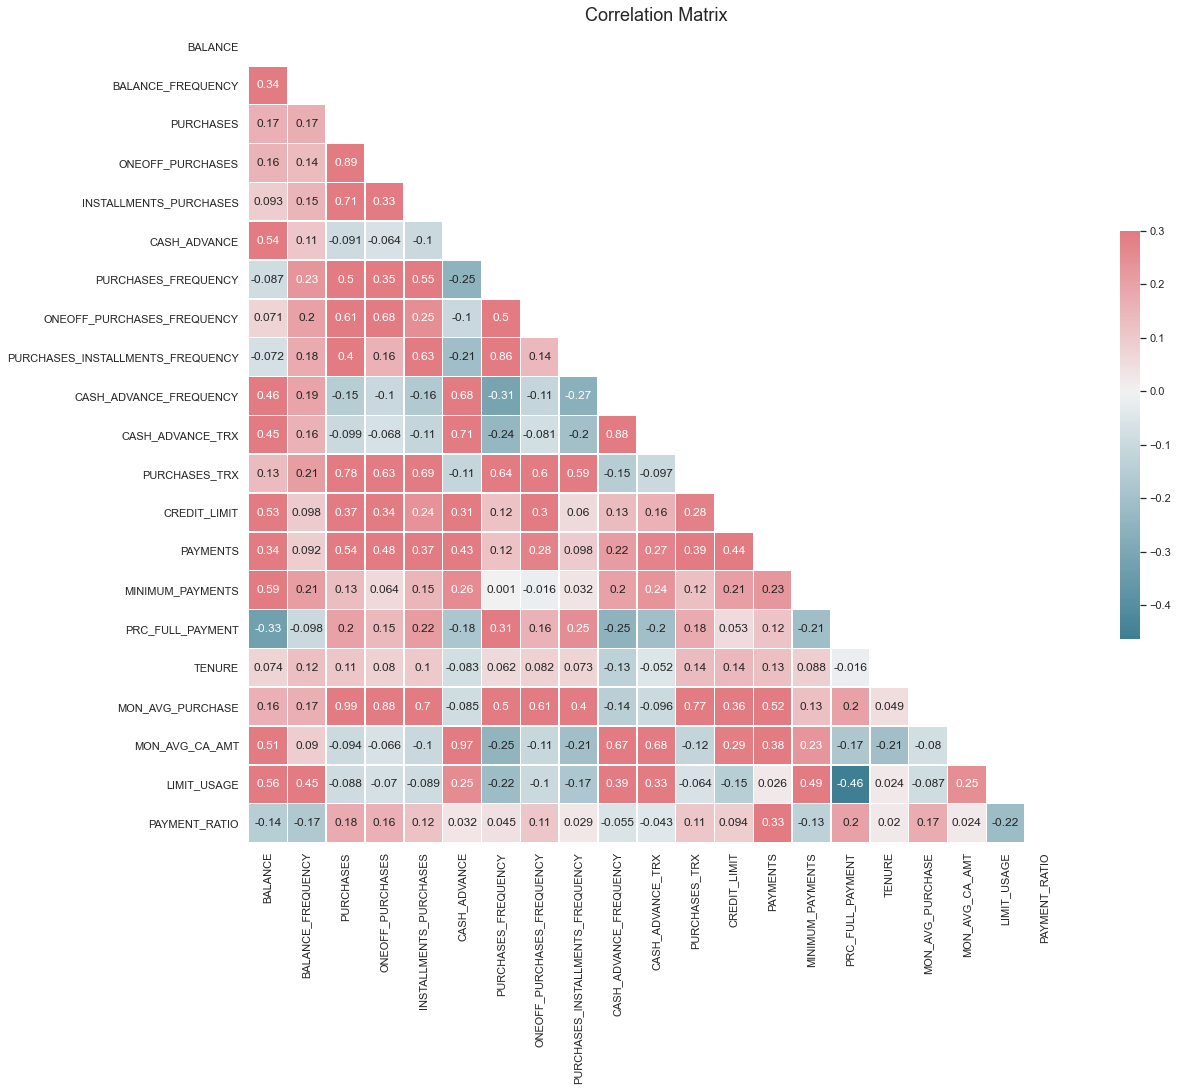

In [64]:
sns.set(style="white")

mask = np.triu(np.ones_like(Corr_Matrix, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(Corr_Matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Data Pre-Processing for Clustering

### Dummy Variable Creaton

In [26]:
OHEnc = OneHotEncoder(sparse=False, drop='first')

In [27]:
OH_cols = pd.DataFrame(OHEnc.fit_transform(CCData[cat_cols]), columns=OHEnc.get_feature_names(['P_TYPE']))

In [28]:
OHEnc.get_feature_names(['P_TYPE'])

array(['P_TYPE_INSTALLMENT', 'P_TYPE_NONE', 'P_TYPE_ONE_OFF'],
      dtype=object)

In [29]:
CCData1 = pd.concat([CCData[num_cols], OH_cols], axis=1)

In [69]:
CCData1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CA_AMT,LIMIT_USAGE,PAYMENT_RATIO,P_TYPE_INSTALLMENT,P_TYPE_NONE,P_TYPE_ONE_OFF
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,1.0,0.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,0.0,1.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0.0,0.0,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,0.0,0.0,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0.0,0.0,1.0


### Standardizing the Data

In [30]:
sc = StandardScaler()

In [31]:
CCData_Scaled = sc.fit_transform(CCData1)

In [72]:
pd.DataFrame(CCData_Scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.486172,-0.525551,0.36068,-0.559583,-0.510509,-0.979686,-0.269353,1.720516,-0.543690,-0.514625
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.255009,0.234227,0.36068,-0.620854,2.704783,0.205564,-0.112606,-0.581221,1.839282,-0.514625
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.098610,-0.525551,0.36068,-0.124282,-0.510509,-0.149528,-0.299312,-0.581221,-0.543690,1.943162
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.348846,-0.525551,0.36068,0.341886,-0.407813,-0.463808,-0.364632,-0.581221,-0.543690,1.943162
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.402520,-0.525551,0.36068,-0.610578,-0.510509,0.842675,-0.182107,-0.581221,-0.543690,1.943162


In [73]:
pd.DataFrame(CCData_Scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8950.0,4.936213e-16,1.000056,-0.783621,-0.718420,-0.339520,0.260919,3.965323
1,8950.0,7.329544e-15,1.000056,-3.363725,0.046174,0.520970,0.520970,0.520970
2,8950.0,-1.813117e-15,1.000056,-0.613881,-0.587892,-0.376991,0.114026,5.272481
3,8950.0,-7.236223e-15,1.000056,-0.489121,-0.489121,-0.454477,0.037299,5.610058
4,8950.0,5.149698e-16,1.000056,-0.568588,-0.568588,-0.436977,0.124423,5.178305
5,8950.0,-4.225348e-15,1.000056,-0.527079,-0.527079,-0.527079,0.100187,4.872650
6,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
7,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
8,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
9,8950.0,-6.862791e-16,1.000056,-0.685371,-0.685371,-0.685371,0.451088,3.576352


### Applying Principle Components Analysis (PCA)

In [74]:
pc = PCA(n_components=CCData1.shape[1])

In [75]:
pc.fit(CCData_Scaled)

PCA(n_components=24)

In [76]:
pc.explained_variance_

array([6.22570833e+00, 4.85480398e+00, 2.27214575e+00, 1.93985428e+00,
       1.26396810e+00, 1.16942683e+00, 9.74487872e-01, 8.54656484e-01,
       7.25624364e-01, 6.81629237e-01, 5.43895409e-01, 5.03006639e-01,
       4.74456534e-01, 3.22064818e-01, 3.01050811e-01, 2.32962596e-01,
       2.03762945e-01, 1.48173884e-01, 1.30756743e-01, 1.03489653e-01,
       3.43486947e-02, 1.93137140e-02, 1.81526580e-02, 4.94153482e-03])

In [77]:
pc.explained_variance_ratio_

array([2.59375530e-01, 2.02260897e-01, 9.46621616e-02, 8.08182308e-02,
       5.26594530e-02, 4.87206738e-02, 4.05991246e-02, 3.56067080e-02,
       3.02309703e-02, 2.83980449e-02, 2.26597766e-02, 2.09562682e-02,
       1.97668134e-02, 1.34178680e-02, 1.25423823e-02, 9.70569029e-03,
       8.48917410e-03, 6.17322202e-03, 5.44758888e-03, 4.31158707e-03,
       1.43103570e-03, 8.04648168e-04, 7.56276241e-04, 2.05874279e-04])

In [78]:
sum(pc.explained_variance_)

24.002681863895415

In [79]:
var= pc.explained_variance_ratio_
var

array([2.59375530e-01, 2.02260897e-01, 9.46621616e-02, 8.08182308e-02,
       5.26594530e-02, 4.87206738e-02, 4.05991246e-02, 3.56067080e-02,
       3.02309703e-02, 2.83980449e-02, 2.26597766e-02, 2.09562682e-02,
       1.97668134e-02, 1.34178680e-02, 1.25423823e-02, 9.70569029e-03,
       8.48917410e-03, 6.17322202e-03, 5.44758888e-03, 4.31158707e-03,
       1.43103570e-03, 8.04648168e-04, 7.56276241e-04, 2.05874279e-04])

In [80]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
cum_var

array([ 25.94,  46.17,  55.64,  63.72,  68.99,  73.86,  77.92,  81.48,
        84.5 ,  87.34,  89.61,  91.71,  93.69,  95.03,  96.28,  97.25,
        98.1 ,  98.72,  99.26,  99.69,  99.83,  99.91,  99.99, 100.01])

In [81]:
EigenTable = pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':cum_var}, index=range(1,25))
EigenTable

,Eigen_value,Cumm_variance
1,6.225708,25.94
2,4.854804,46.17
3,2.272146,55.64
4,1.939854,63.72
5,1.263968,68.99
6,1.169427,73.86
7,0.974488,77.92
8,0.854656,81.48
9,0.725624,84.50
10,0.681629,87.34


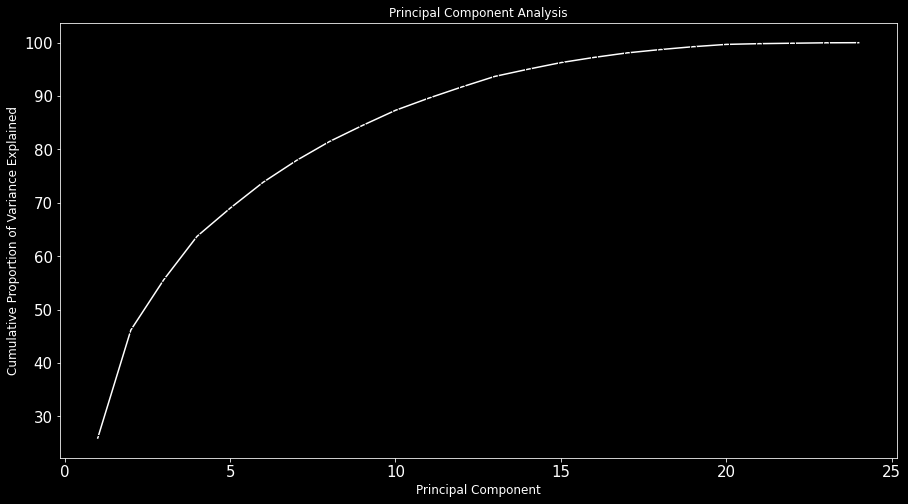

In [86]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8))
    plt.plot(EigenTable.Cumm_variance,'w-o',markerfacecolor='None',markeredgecolor='k')
    plt.title('Principal Component Analysis',fontsize=12)
    plt.xlabel("Principal Component",fontsize=12)
    plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
    plt.show()


#### Eigen value is almost 1 (0.97) with almost 78% explained variance at n_components = 7, which seems like the best value.

#### Final Iteration of PCA model with n_components = 7

In [88]:
pc_final = PCA(n_components=7).fit(CCData_Scaled)

In [89]:
pc_final.explained_variance_

array([6.22570833, 4.85480398, 2.27214575, 1.93985428, 1.2639681 ,
       1.16942683, 0.97448785])

In [90]:
CCData_Components = pc_final.fit_transform(CCData_Scaled)

In [91]:
CC_Dimensions = pd.DataFrame(CCData_Components)

In [92]:
CC_Dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

In [93]:
CC_Dimensions.head()

,C1,C2,C3,C4,C5,C6,C7
0,-1.167260,-2.418956,-0.446813,0.157760,0.146639,0.534245,0.172019
1,-2.780054,3.190717,0.094763,1.796868,0.761021,0.621741,-0.384616
2,0.971741,-0.204661,1.958549,-1.953384,-1.852811,0.722623,-0.825987
3,-0.430871,-0.520998,2.365033,-0.784690,-0.564753,1.276041,0.724222
4,-1.587462,-1.202672,1.283855,-1.826304,-0.502934,0.321161,-0.162966


In [94]:
CC_Dimensions.shape

(8950, 7)

#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [203]:
CC_Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=CCData1.columns).T

In [39]:
#CC_Loadings.to_csv("CC_Loadings.csv")

In [42]:
CCData1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MON_AVG_PURCHASE', 'MON_AVG_CA_AMT', 'LIMIT_USAGE',
       'PAYMENT_RATIO', 'P_TYPE_INSTALLMENT', 'P_TYPE_NONE', 'P_TYPE_ONE_OFF'],
      dtype='object')

#### Selecting the list of variables based on the analysis of Components loading and Correlation Matrix:

In [32]:
final_vars = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
              'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS', 
              'MINIMUM_PAYMENTS', 'TENURE', 'MON_AVG_CA_AMT', 'LIMIT_USAGE', 'PAYMENT_RATIO', 'P_TYPE_INSTALLMENT']

In [33]:
CCData_Scaled1 = pd.DataFrame(CCData_Scaled, columns=CCData1.columns)
CCData_Scaled1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CA_AMT,LIMIT_USAGE,PAYMENT_RATIO,P_TYPE_INSTALLMENT,P_TYPE_NONE,P_TYPE_ONE_OFF
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.486172,-0.525551,0.36068,-0.559583,-0.510509,-0.979686,-0.269353,1.720516,-0.543690,-0.514625
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.255009,0.234227,0.36068,-0.620854,2.704783,0.205564,-0.112606,-0.581221,1.839282,-0.514625
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.098610,-0.525551,0.36068,-0.124282,-0.510509,-0.149528,-0.299312,-0.581221,-0.543690,1.943162
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.348846,-0.525551,0.36068,0.341886,-0.407813,-0.463808,-0.364632,-0.581221,-0.543690,1.943162
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.402520,-0.525551,0.36068,-0.610578,-0.510509,0.842675,-0.182107,-0.581221,-0.543690,1.943162


In [34]:
CCData_Scaled2 = CCData_Scaled1[final_vars]
CCData_Scaled2.head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE,MON_AVG_CA_AMT,LIMIT_USAGE,PAYMENT_RATIO,P_TYPE_INSTALLMENT
0,-0.762856,-0.489121,-0.427513,-0.806490,-0.678661,-0.685371,-0.579714,-0.642945,-0.486172,0.36068,-0.510509,-0.979686,-0.269353,1.720516
1,0.844867,-0.489121,-0.568588,-1.221758,-0.678661,0.593147,-0.675130,1.089747,0.255009,0.36068,2.704783,0.205564,-0.112606,-0.581221
2,0.485181,0.215778,-0.568588,1.269843,2.673451,-0.685371,-0.102638,-0.456289,-0.098610,0.36068,-0.510509,-0.149528,-0.299312,-0.581221
3,0.063882,0.877517,-0.568588,-1.014125,-0.399319,-0.259200,-0.627422,-0.732573,-0.348846,0.36068,-0.407813,-0.463808,-0.364632,-0.581221
4,-0.367830,-0.474534,-0.568588,-1.014125,-0.399319,-0.685371,-0.627422,-0.431298,-0.402520,0.36068,-0.510509,0.842675,-0.182107,-0.581221


## Segmentation using KMeans Clustering

In [35]:
km_3 = KMeans(n_clusters=3,random_state=12345).fit(CCData_Scaled2)

km_4 = KMeans(n_clusters=4,random_state=12345).fit(CCData_Scaled2)

km_5 = KMeans(n_clusters=5,random_state=12345).fit(CCData_Scaled2)

km_6 = KMeans(n_clusters=6,random_state=12345).fit(CCData_Scaled2)

km_7 = KMeans(n_clusters=7,random_state=12345).fit(CCData_Scaled2)

km_8 = KMeans(n_clusters=8,random_state=12345).fit(CCData_Scaled2)

In [36]:
CCData1['cluster_3'] = km_3.labels_
CCData1['cluster_4'] = km_4.labels_
CCData1['cluster_5'] = km_5.labels_
CCData1['cluster_6'] = km_6.labels_
CCData1['cluster_7'] = km_7.labels_
CCData1['cluster_8'] = km_8.labels_

In [101]:
CCData1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENT_RATIO,P_TYPE_INSTALLMENT,P_TYPE_NONE,P_TYPE_ONE_OFF,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.446508,1.0,0.0,0.0,2,2,3,2,1,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,3.826241,0.0,1.0,0.0,0,3,4,4,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.991682,0.0,0.0,1.0,1,0,2,3,4,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.0,0.0,1.0,2,1,1,1,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.771075,0.0,0.0,1.0,2,1,1,1,0,1


## QUANTITATIVE EVALUATION

### Segment Distribution Check

In [103]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.482123
0    0.354525
1    0.163352
dtype: float64

#### Most of the Customers (48%) are clustered in 1st cluster only, So km_3 is a bad model.

In [104]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.428939
2    0.241229
0    0.186816
3    0.143017
dtype: float64

#### Still 42% of the customers are in 1st cluster, km_4 wasn't able to segment customers properly aswell

In [105]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.359441
3    0.231061
2    0.221117
4    0.127821
0    0.060559
dtype: float64

In [106]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

1    0.327151
2    0.212626
3    0.211732
4    0.117095
5    0.072067
0    0.059330
dtype: float64

In [107]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

0    0.328603
1    0.212067
4    0.211844
5    0.117542
3    0.072402
2    0.056983
6    0.000559
dtype: float64

In [108]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

1    0.214860
3    0.209721
0    0.194972
2    0.176089
6    0.086592
5    0.069162
4    0.048045
7    0.000559
dtype: float64

#### Any model above km_4 up until km_6 seems like a decent option according to Segment Size Check as Segments are well distributed.
#### For km_7 and km_8, segments aren't well distributed and he last segments in the mentioned models contains much less observations than expected, they are more like noises than clusters.

In [109]:
SegmentDF = pd.DataFrame(index=range(0,8))
for km in [km_3, km_4, km_5, km_6, km_7, km_8]:
    SegmentDF = pd.concat((SegmentDF,((pd.Series(km.labels_).value_counts()/sum(pd.Series(km.labels_).value_counts()))).sort_index()), axis=1)

SegmentDF.columns = ['km_3', 'km_4', 'km_5', 'km_6', 'km_7', 'km_8']

SegmentDF

,km_3,km_4,km_5,km_6,km_7,km_8
0,0.354525,0.186816,0.060559,0.059330,0.328603,0.194972
1,0.163352,0.428939,0.359441,0.327151,0.212067,0.214860
2,0.482123,0.241229,0.221117,0.212626,0.056983,0.176089
3,NaN,0.143017,0.231061,0.211732,0.072402,0.209721
4,NaN,NaN,0.127821,0.117095,0.211844,0.048045
5,NaN,NaN,NaN,0.072067,0.117542,0.069162
6,NaN,NaN,NaN,NaN,0.000559,0.086592
7,NaN,NaN,NaN,NaN,NaN,0.000559


### Silhouette Cofficient

In [111]:
# calculate SC for K=3 through K=16
n_range = range(2, 16)
scores = []
for n in n_range:
    km = KMeans(n_clusters=n, random_state=12345)
    km.fit(CCData_Scaled2)
    scores.append(metrics.silhouette_score(CCData_Scaled2, km.labels_))

In [106]:
scores

[0.2814274896508462,
 0.20329913492479623,
 0.2132893965369649,
 0.23230291227279823,
 0.24458797433149213,
 0.24718983414647014,
 0.21198472690623946,
 0.22134712939280854,
 0.22535191077055414,
 0.22526155865116496,
 0.23067911942818656,
 0.23807435326275922,
 0.24127234300315842,
 0.24379563594837855]

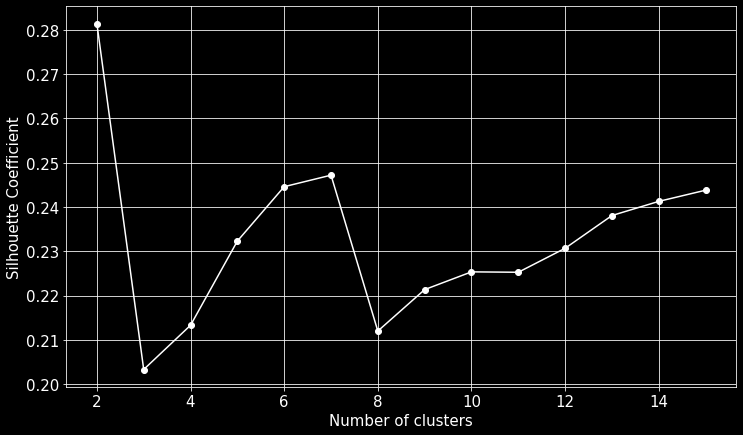

In [114]:
# plot the results
with plt.style.context('dark_background'):
    plt.figure(figsize=(12,7))
    plt.plot(n_range, scores, 'w-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)

#### SC score peaked at n_clusters = 2 but according to Segment Size Check for n_cluster = 2, Segments aren't well distributed.

#### Next highest SC Scores are for n_cluster = 6 followed by 7 but km_7 isn't a well distributed segmentaion model, so we will go with km_6 i.e. 6 Clusters KMeans Solution.

# Qualitative Evaluation

## Profiling

In [108]:
CCData1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENT_RATIO,P_TYPE_INSTALLMENT,P_TYPE_NONE,P_TYPE_ONE_OFF,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.446508,1.0,0.0,0.0,2,2,3,2,1,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,3.826241,0.0,1.0,0.0,0,3,4,4,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.991682,0.0,0.0,1.0,1,0,2,3,4,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.0,0.0,1.0,2,1,1,1,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.771075,0.0,0.0,1.0,2,1,1,1,0,1


In [109]:
CCData1.cluster_3.value_counts()/sum(CCData1.cluster_3.value_counts())

2    0.482123
0    0.354525
1    0.163352
Name: cluster_3, dtype: float64

In [110]:
CCData1.cluster_3.value_counts()*100/sum(CCData1.cluster_3.value_counts())

2    48.212291
0    35.452514
1    16.335196
Name: cluster_3, dtype: float64

In [111]:
pd.Series.sort_index(CCData1.cluster_5.value_counts())

0     542
1    3217
2    1979
3    2068
4    1144
Name: cluster_5, dtype: int64

In [112]:
CCData1.cluster_3.size

8950

In [113]:
CCData1.cluster_3.value_counts()/CCData1.cluster_3.size

2    0.482123
0    0.354525
1    0.163352
Name: cluster_3, dtype: float64

In [114]:
size = pd.concat([pd.Series(CCData1.cluster_3.size), pd.Series.sort_index(CCData1.cluster_3.value_counts()), pd.Series.sort_index(CCData1.cluster_4.value_counts()),
           pd.Series.sort_index(CCData1.cluster_5.value_counts()), pd.Series.sort_index(CCData1.cluster_6.value_counts()),
           pd.Series.sort_index(CCData1.cluster_7.value_counts()), pd.Series.sort_index(CCData1.cluster_8.value_counts())])

In [115]:
size

0    8950
0    3173
1    1462
2    4315
0    1672
1    3839
2    2159
3    1280
0     542
1    3217
2    1979
3    2068
4    1144
0     531
1    2928
2    1903
3    1895
4    1048
5     645
0    2941
1    1898
2     510
3     648
4    1896
5    1052
6       5
0    1745
1    1923
2    1576
3    1877
4     430
5     619
6     775
7       5
dtype: int64

In [116]:
Seg_size = pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/CCData1.cluster_3.size, columns=['Seg_Pct'])

In [117]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.354525,0.163352,0.482123,0.186816,0.428939,0.241229,0.143017,0.060559,0.359441,...,0.117542,0.000559,0.194972,0.21486,0.176089,0.209721,0.048045,0.069162,0.086592,0.000559


In [118]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,3173.000000,1462.000000,4315.000000,1672.000000,3839.000000,2159.000000,1280.000000,542.000000,3217.000000,...,1052.000000,5.000000,1745.000000,1923.00000,1576.000000,1877.000000,430.000000,619.000000,775.000000,5.000000
Seg_Pct,1.0,0.354525,0.163352,0.482123,0.186816,0.428939,0.241229,0.143017,0.060559,0.359441,...,0.117542,0.000559,0.194972,0.21486,0.176089,0.209721,0.048045,0.069162,0.086592,0.000559


In [119]:
CCData1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENT_RATIO,P_TYPE_INSTALLMENT,P_TYPE_NONE,P_TYPE_ONE_OFF,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.446508,1.0,0.0,0.0,2,2,3,2,1,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,3.826241,0.0,1.0,0.0,0,3,4,4,5,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.991682,0.0,0.0,1.0,1,0,2,3,4,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.0,0.0,1.0,2,1,1,1,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.771075,0.0,0.0,1.0,2,1,1,1,0,1


In [120]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([CCData1.apply(lambda x: x.mean()).T, CCData1.groupby('cluster_3').apply(lambda x: x.mean()).T, CCData1.groupby('cluster_4').apply(lambda x: x.mean()).T,
          CCData1.groupby('cluster_5').apply(lambda x: x.mean()).T, CCData1.groupby('cluster_6').apply(lambda x: x.mean()).T,
          CCData1.groupby('cluster_7').apply(lambda x: x.mean()).T, CCData1.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [121]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,2768.777548,2131.568499,438.165404,1723.451633,1051.010242,464.913749,4587.640463,3013.330123,1140.955946,...,4987.749947,68.815871,443.726962,2196.031005,1181.846440,473.879451,3354.561964,755.631100,5332.250012,68.815871
BALANCE_FREQUENCY,0.878083,0.955258,0.974877,0.788538,0.972089,0.841574,0.816567,0.968549,0.979034,0.832491,...,0.974899,0.400000,0.726829,0.985400,0.969880,0.805435,0.985957,0.779006,0.964009,0.400000
PURCHASES,936.229237,273.868248,3460.739535,567.941256,3096.079551,363.616859,526.565262,523.302453,5510.225775,219.712316,...,529.560323,210.304000,427.138917,200.640926,1900.348433,524.606255,6010.235465,393.689903,566.812735,210.304000
ONEOFF_PURCHASES,536.493774,177.135673,2212.868521,232.758751,2004.795324,280.822566,8.697202,275.583130,3423.272313,185.791663,...,287.327734,146.440000,327.530453,139.063552,1266.355810,0.000000,3641.417291,239.864120,324.987286,146.440000
INSTALLMENTS_PURCHASES,384.498368,96.833407,1153.333545,335.535191,1024.526476,82.916747,514.547014,233.615418,1858.888636,33.956068,...,234.151979,63.864000,99.812573,61.654675,631.501657,520.770273,2087.193442,153.874249,235.783795,63.864000
CASH_ADVANCE,935.920972,2154.141072,592.513813,156.465326,381.545793,624.041773,153.043603,3915.961432,823.608685,766.591588,...,4101.553472,4146.069282,451.841851,1006.049515,288.262370,147.940989,719.253195,977.116255,5143.954247,4146.069282
PURCHASES_FREQUENCY,0.490351,0.196880,0.930083,0.557163,0.927566,0.234648,0.716517,0.304666,0.948216,0.127505,...,0.323382,0.200000,0.250876,0.161297,0.896410,0.698548,0.956916,0.417505,0.317238,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.087621,0.691280,0.121280,0.684557,0.131888,0.005813,0.116054,0.711767,0.081494,...,0.121419,0.016667,0.130012,0.072146,0.609811,0.000000,0.711342,0.120620,0.135101,0.016667
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.119246,0.664556,0.443051,0.632367,0.119706,0.679572,0.216915,0.796693,0.049249,...,0.233769,0.200000,0.131547,0.096841,0.565506,0.669899,0.818384,0.282711,0.218578,0.200000
CASH_ADVANCE_FREQUENCY,0.134017,0.297983,0.081137,0.031362,0.060208,0.130624,0.026909,0.421266,0.092248,0.157270,...,0.415479,0.100000,0.068593,0.219329,0.057888,0.024066,0.084863,0.194498,0.469934,0.100000


In [122]:
Profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [123]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,3173.000000,1462.000000,4315.000000,1672.000000,3839.000000,2159.000000,1280.000000,542.000000,3217.000000,...,1052.000000,5.000000,1745.000000,1923.000000,1576.000000,1877.000000,430.000000,619.000000,775.000000,5.000000
Seg_Pct,1.000000,0.354525,0.163352,0.482123,0.186816,0.428939,0.241229,0.143017,0.060559,0.359441,...,0.117542,0.000559,0.194972,0.214860,0.176089,0.209721,0.048045,0.069162,0.086592,0.000559
BALANCE,1541.046707,2768.777548,2131.568499,438.165404,1723.451633,1051.010242,464.913749,4587.640463,3013.330123,1140.955946,...,4987.749947,68.815871,443.726962,2196.031005,1181.846440,473.879451,3354.561964,755.631100,5332.250012,68.815871
BALANCE_FREQUENCY,0.878083,0.955258,0.974877,0.788538,0.972089,0.841574,0.816567,0.968549,0.979034,0.832491,...,0.974899,0.400000,0.726829,0.985400,0.969880,0.805435,0.985957,0.779006,0.964009,0.400000
PURCHASES,936.229237,273.868248,3460.739535,567.941256,3096.079551,363.616859,526.565262,523.302453,5510.225775,219.712316,...,529.560323,210.304000,427.138917,200.640926,1900.348433,524.606255,6010.235465,393.689903,566.812735,210.304000
ONEOFF_PURCHASES,536.493774,177.135673,2212.868521,232.758751,2004.795324,280.822566,8.697202,275.583130,3423.272313,185.791663,...,287.327734,146.440000,327.530453,139.063552,1266.355810,0.000000,3641.417291,239.864120,324.987286,146.440000
INSTALLMENTS_PURCHASES,384.498368,96.833407,1153.333545,335.535191,1024.526476,82.916747,514.547014,233.615418,1858.888636,33.956068,...,234.151979,63.864000,99.812573,61.654675,631.501657,520.770273,2087.193442,153.874249,235.783795,63.864000
CASH_ADVANCE,935.920972,2154.141072,592.513813,156.465326,381.545793,624.041773,153.043603,3915.961432,823.608685,766.591588,...,4101.553472,4146.069282,451.841851,1006.049515,288.262370,147.940989,719.253195,977.116255,5143.954247,4146.069282
PURCHASES_FREQUENCY,0.490351,0.196880,0.930083,0.557163,0.927566,0.234648,0.716517,0.304666,0.948216,0.127505,...,0.323382,0.200000,0.250876,0.161297,0.896410,0.698548,0.956916,0.417505,0.317238,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.087621,0.691280,0.121280,0.684557,0.131888,0.005813,0.116054,0.711767,0.081494,...,0.121419,0.016667,0.130012,0.072146,0.609811,0.000000,0.711342,0.120620,0.135101,0.016667


In [124]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [125]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,3173.000000,1462.000000,4315.000000,1672.000000,3839.000000,2159.000000,1280.000000,542.000000,3217.000000,...,1052.000000,5.000000,1745.000000,1923.000000,1576.000000,1877.000000,430.000000,619.000000,775.000000,5.000000
Seg_Pct,1.000000,0.354525,0.163352,0.482123,0.186816,0.428939,0.241229,0.143017,0.060559,0.359441,...,0.117542,0.000559,0.194972,0.214860,0.176089,0.209721,0.048045,0.069162,0.086592,0.000559
BALANCE,1541.046707,2768.777548,2131.568499,438.165404,1723.451633,1051.010242,464.913749,4587.640463,3013.330123,1140.955946,...,4987.749947,68.815871,443.726962,2196.031005,1181.846440,473.879451,3354.561964,755.631100,5332.250012,68.815871
BALANCE_FREQUENCY,0.878083,0.955258,0.974877,0.788538,0.972089,0.841574,0.816567,0.968549,0.979034,0.832491,...,0.974899,0.400000,0.726829,0.985400,0.969880,0.805435,0.985957,0.779006,0.964009,0.400000
PURCHASES,936.229237,273.868248,3460.739535,567.941256,3096.079551,363.616859,526.565262,523.302453,5510.225775,219.712316,...,529.560323,210.304000,427.138917,200.640926,1900.348433,524.606255,6010.235465,393.689903,566.812735,210.304000
ONEOFF_PURCHASES,536.493774,177.135673,2212.868521,232.758751,2004.795324,280.822566,8.697202,275.583130,3423.272313,185.791663,...,287.327734,146.440000,327.530453,139.063552,1266.355810,0.000000,3641.417291,239.864120,324.987286,146.440000
INSTALLMENTS_PURCHASES,384.498368,96.833407,1153.333545,335.535191,1024.526476,82.916747,514.547014,233.615418,1858.888636,33.956068,...,234.151979,63.864000,99.812573,61.654675,631.501657,520.770273,2087.193442,153.874249,235.783795,63.864000
CASH_ADVANCE,935.920972,2154.141072,592.513813,156.465326,381.545793,624.041773,153.043603,3915.961432,823.608685,766.591588,...,4101.553472,4146.069282,451.841851,1006.049515,288.262370,147.940989,719.253195,977.116255,5143.954247,4146.069282
PURCHASES_FREQUENCY,0.490351,0.196880,0.930083,0.557163,0.927566,0.234648,0.716517,0.304666,0.948216,0.127505,...,0.323382,0.200000,0.250876,0.161297,0.896410,0.698548,0.956916,0.417505,0.317238,0.200000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.087621,0.691280,0.121280,0.684557,0.131888,0.005813,0.116054,0.711767,0.081494,...,0.121419,0.016667,0.130012,0.072146,0.609811,0.000000,0.711342,0.120620,0.135101,0.016667


In [98]:
#Profling_output_final.to_csv('CCData_Profiling_Output.csv')

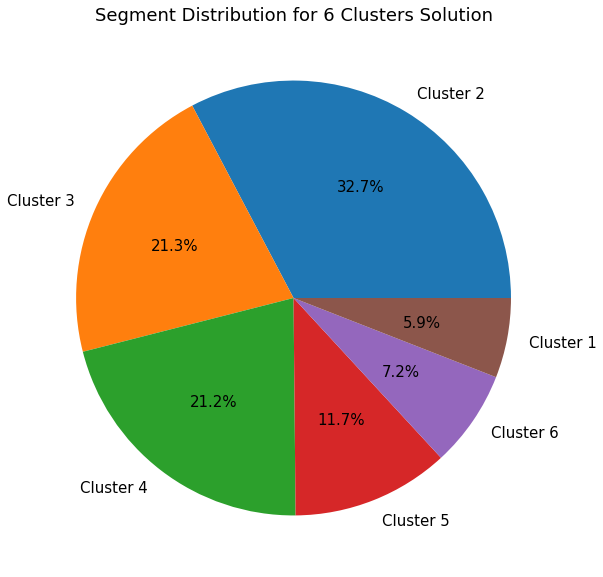

In [120]:
plt.figure(figsize=(10,10))
plt.pie(CCData1.cluster_6.value_counts(), autopct='%.1f%%', labels=[f'Cluster {x}' for x in [2,3,4,5,6,1]])
plt.title('Segment Distribution for 6 Clusters Solution')
plt.show()

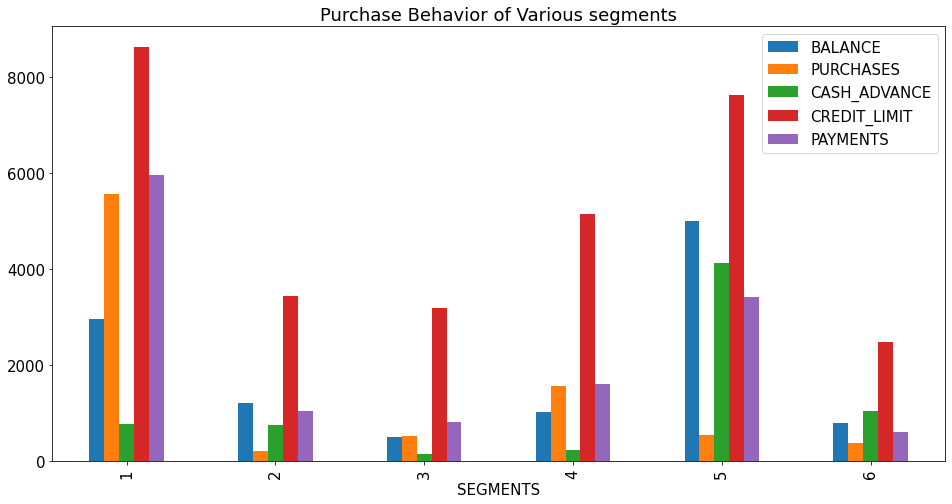

In [51]:
(CCData1[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'cluster_6']]
 .groupby('cluster_6').mean().plot.bar(figsize=(16, 8)))
plt.title('Purchase Behavior of Various segments')
plt.xlabel('SEGMENTS')
plt.xticks([0,1,2,3,4,5], [1,2,3,4,5,6])
plt.show()

Text(0.5, 0.98, 'Frequency behavior of Various Segments')

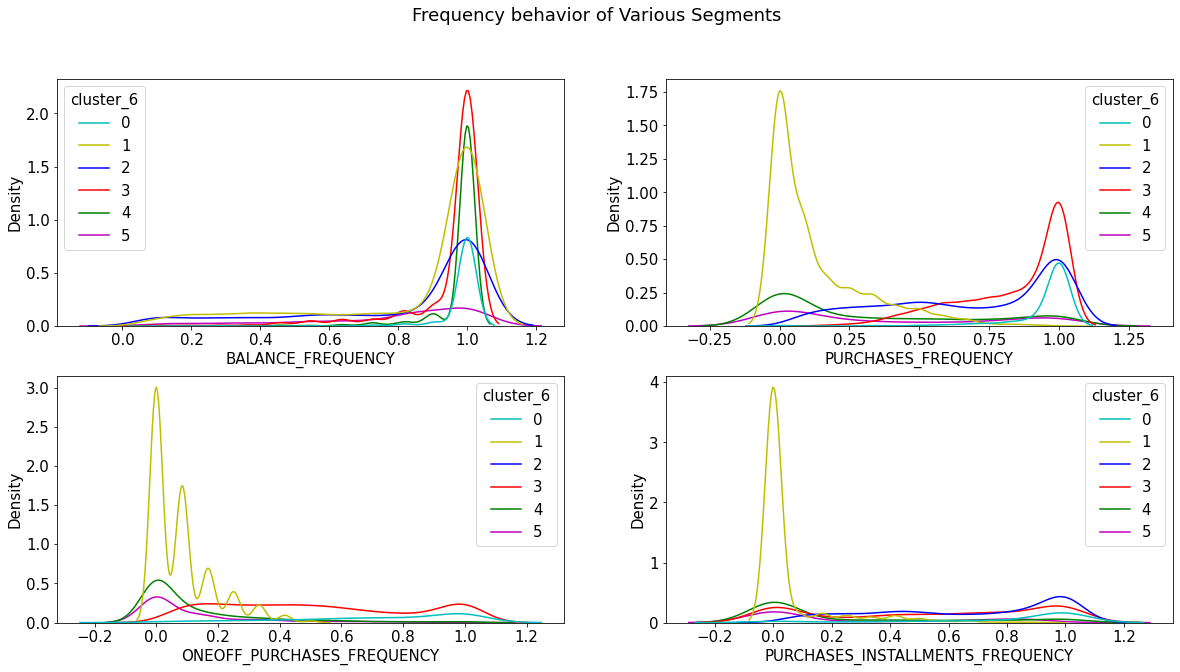

In [66]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
ax = ax.flatten()
for i,col in zip(range(len(ax)), ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']):
    ax[i] = sns.kdeplot(data=CCData1, x=col, hue='cluster_6', palette=['c', 'y', 'b', 'r', 'g', 'm'], ax=ax[i])
fig.suptitle('Frequency behavior of Various Segments')

                Joint Plot : LIMIT_USAGE vs BALANCE


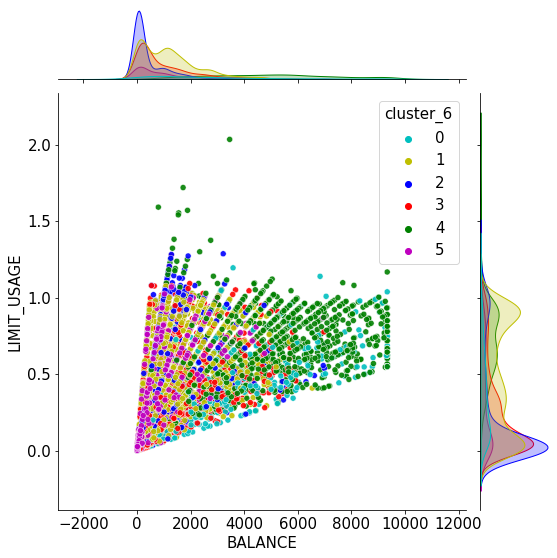

In [77]:
print('                Joint Plot : LIMIT_USAGE vs BALANCE')
sns.jointplot(data=CCData1, x="BALANCE", y="LIMIT_USAGE", hue="cluster_6", palette=['c', 'y', 'b', 'r', 'g', 'm'], alpha=0.9, height=8)
plt.show()

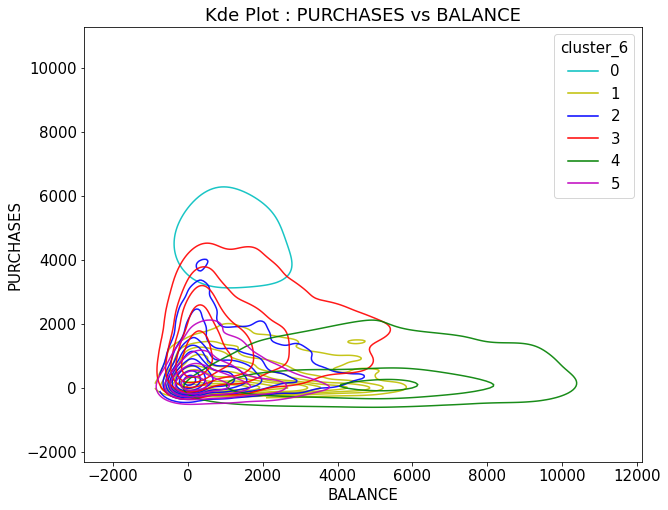

In [79]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=CCData1, x="BALANCE", y="PURCHASES", hue="cluster_6", palette=['c', 'y', 'b', 'r', 'g', 'm'], alpha=.9)
plt.title('Kde Plot : PURCHASES vs BALANCE')
plt.show()

## Insights
### Large Segments
#### Cluster 2 (33%)
This cluster contains the largest group of inactive customers having highest non-purchase history. Most of the purchases are one-off only with low purchase transaction and low monthly average purchases and yet their limit usage is moderately fine. The reason could be having  a moderate cash advance transactions, Their payments ratio is high despite of having low payments history, It might be due to low minimum payments.

#### Cluster 3 (21%)
This cluster contains the second largest group of non - risky/economic customers having low balance. Their overall purchases and cash advance are low. They only make installment purchases, they might be middle class low income customers who can't afford to purchase stuff in one go. Which leads them to not utilize their credit card lines even upto one fifth of it's potential despite of having a low credit limit.

#### Cluster 4 (21%)
This cluster is same as cluster 4 in size but contains customers having low balance which might be due to the fact that these customers likes to pay in full quite frequently than others also, their payment ratio is very high. They are Max payers, who are responsible and don't like to keep much outstanding balance. They have high purchases of both types with high monthly average and purchase transactons. Their credit limit is moderate and yet low limit usage.

### Small Segments
#### Cluster 5 (12%)
This cluster contains a comparatively small group of customers having very high balance but little to no purchase transactions. They only use their card for cash advance having very high cash advance transactions and monthly average amount.
They have high credit limit and its usage upto the potential but the concerning part is their low payments ratio. They might be using their cards as loan source and most likely to go default.

#### Cluster 6 (7%)
This cluster conatins the second smallest group of customers with comparably lowest tenure average than others which means these are the newest customers. They have low balance with low credit limit. Their most of the purchases are of installment types only but they seems to be as much interested in cash advance with relatively high monthly average cash advance amount. This cluster is still incoherent, it might be because these customers are new and being very careful about using it.

#### Cluster 1 (5%)
This cluster contains the smallest group of luxurious customers having high credit limit with high purchases of both types ( one-off and installments). They rarely withdraw cash amount. They have high balance but are less likely to default as their payment ratio is very high. And most of the time, they make full payments.

## Recommended Strategies
#### Clutser 1 :
They are the most profitable customers so banks should try to keep them indulge into using their credit line with fancy offers.


#### Clutser 2 :
These customers are not utilizing their credit line assigned to them. They only seems to be interested in cash advance, so they need to be introduced with good offers on purchase. More analysis about these customers are needed to find out about their inactiveness maybe via a feedback form.  Also, credit line of non-users from these group of customers can be re assigned to new customers in future.

#### Clutser 3 :
They are in dire need of high discount offers in one-off purchases so they can get comfortable using their credit card more to be able to utilize their lines properly.

#### Clutser 4 :
They are least profitable yet most responsive customers with zero to no chance of going default. So bank should try different ways to retain them for as long as possible.

#### Clutser 5 :
As these customers are most likely to go default, They should be given some alerts from time to time. Maybe decreasing their credit limit and good purchase offers can keep them on the safe side.

#### Cluster 6 :
As these are new customers, They should be introduced with good offers on purchase, specially for One-off purchases so they can start using their credit line to somewhat of it's potential and it can also build customer - bank trust so their chances of continuity with the bank will also increase.